## Digit Recognizer
https://www.kaggle.com/c/digit-recognizer

In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Загружаем исходные данные

In [2]:
train = np.loadtxt('../data/digit/train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('../data/digit/test.csv', delimiter=',', skiprows=1)

In [3]:
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [4]:
# сохраняем разметку в отдельную переменную
train_label = train[:, 0]
# приводим размерность к удобному для визуализации виду
train_img = np.resize(train[:, 1:], (train.shape[0], 28, 28))
test_img = np.resize(test, (test.shape[0], 28, 28))

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train[:, 1:], train_label, test_size=0.2, random_state=42)

In [6]:
train_img.shape

(42000, 28, 28)

## Визуализируем исходные данные

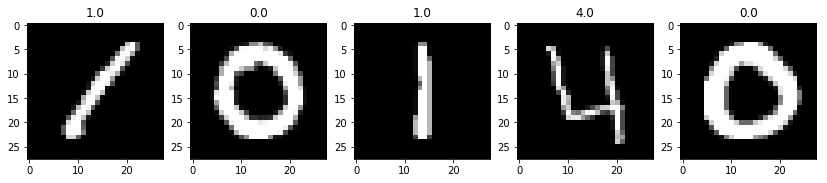

In [7]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);

## Сокращаем размерность при помощи PCA

In [8]:
from sklearn.decomposition import PCA

In [9]:
S_cumsum = []
pca = PCA(n_components=X_train.shape[1]).fit(X_train)
for i in range(1, X_train.shape[1] + 1):
    S_cumsum.append(sum(pca.explained_variance_ratio_[:i]))

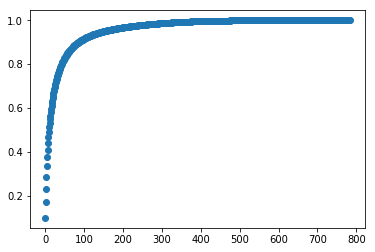

In [10]:
plt.plot(S_cumsum, 'o')

In [11]:
S_cumsum[100]

0.9161137207497001

In [12]:
pca = PCA(n_components = 100, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

## Применяем логистическую регрессию

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
%%time
lr = LogisticRegression(verbose=3)
lr.fit(X_train_pca, y_train)
pred = lr.predict(X_test_pca)
pred[:6]

[LibLinear]Wall time: 4min 11s


## Оцениваем результат предсказаний

In [15]:
from sklearn.metrics import accuracy_score
print('Accuracy: %s' % accuracy_score(y_test, pred))

Accuracy: 0.9080952380952381


In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

        0.0       0.96      0.97      0.96       816
        1.0       0.95      0.98      0.96       909
        2.0       0.90      0.88      0.89       846
        3.0       0.91      0.86      0.88       937
        4.0       0.90      0.92      0.91       839
        5.0       0.84      0.84      0.84       702
        6.0       0.92      0.96      0.94       785
        7.0       0.93      0.92      0.92       893
        8.0       0.89      0.85      0.87       835
        9.0       0.87      0.89      0.88       838

avg / total       0.91      0.91      0.91      8400



In [17]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred))

[[792   0   0   0   2   9   8   1   3   1]
 [  1 890   2   1   1   3   1   1   8   1]
 [  3  13 746  14  19   7  10  13  20   1]
 [  2   3  27 809   0  40   4  13  22  17]
 [  2   2   6   1 776   2   9   2   4  35]
 [ 11   4   7  23  16 587  22   5  21   6]
 [  6   1   7   1   5   5 756   0   4   0]
 [  0   2  18   2  11   2   1 821   2  34]
 [  4  19   7  27  10  35   9   2 708  14]
 [  5   3   5  15  26   7   0  28   6 743]]


## Предсказываем на тестовых данных

In [18]:
test_pca = pca.transform(test)
pred_test = lr.predict(test_pca)

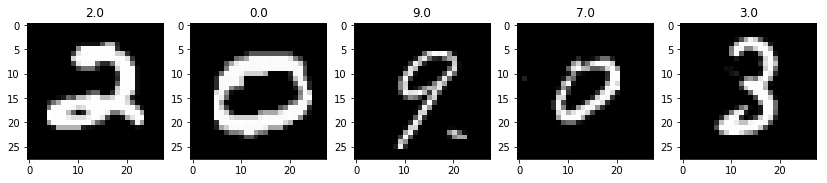

In [19]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(test_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % pred_test[i - 1]);

## Готовим файл для отправки

In [20]:
with open('submit.txt', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(pred_test, 1):
        dst.write('%s,%s\n' % (i, int(p)))

In [21]:
# Your submission scored 0.91114